Since we need to concentrate only on high value customers, let's follow the below steps
- Data Cleaning
- Filter for high balue customers
- Predictor Variable



















- EDA
- Modelling

## Step 1: Data Cleaning

In [0]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)


In [157]:
# import data
raw = pd.read_csv('telecom_churn_data.csv')
df = raw.copy(deep=True)
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [158]:
# check shape of df
df.shape

(99999, 226)

In [159]:
# Check how many columns are under different dtypes
df.dtypes.value_counts()

float64    179
int64       35
object      12
dtype: int64

In [160]:
  # numerical columns
df.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

In [161]:
# categorical columns
df.describe(include = 'object')

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 98340               98392               98232   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  98340               16960               17288   

       date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
count                96377               95239                    25153   
unique                  31                  30                       30   
top              8/31/2014           9/29/2014                6/30/2014   
freq                 14706               22623                     1888   

       date_of_last_rech_data_7 date_of_last_rech_data_8  \
count                     25571                    26339   
unique                       31                       31   
top                   7/31/2014                8/31/2014   
freq                       1813                     1998   

       date_of_last_rech_data_9  
count                     25922  
unique                       30  
top                   9/29/2014  
freq                       2329

In [0]:
df=df.rename({'aug_vbc_3g':'vbc_8','jul_vbc_3g':'vbc_7','jun_vbc_3g':'vbc_6','sep_vbc_3g':'vbc_9'},axis=1)

### We see lot of date columns are mentioned as categorical columns, and categorical columns as numerical columns 

In [163]:
df.select_dtypes(include='object').columns


Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [164]:
# filter columns having date in their name
date_col = df.filter(like='date').columns.values
date_col

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9',
       'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype=object)

In [165]:
df.night_pck_user_9.unique()

array([nan,  0.,  1.])

In [166]:
df.std_og_t2o_mou.unique()

array([ 0., nan])

### Looking at the above distribution we can say, the below columns as categorical columns

In [167]:
cat_col=[]
for col in df.columns:
    if len(df[col].unique())<15:
        cat_col.append(col)
cat_col        

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'monthly_3g_6',
 'monthly_3g_8',
 'monthly_3g_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [0]:
df[cat_col] = df[cat_col].astype('object')
df[date_col] = df[date_col].astype('datetime64[ns]')

In [169]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   circle_id                 object        
 2   loc_og_t2o_mou            object        
 3   std_og_t2o_mou            object        
 4   loc_ic_t2o_mou            object        
 5   last_date_of_month_6      datetime64[ns]
 6   last_date_of_month_7      datetime64[ns]
 7   last_date_of_month_8      datetime64[ns]
 8   last_date_of_month_9      datetime64[ns]
 9   arpu_6                    float64       
 10  arpu_7                    float64       
 11  arpu_8                    float64       
 12  arpu_9                    float64       
 13  onnet_mou_6               float64       
 14  onnet_mou_7               float64       
 15  onnet_mou_8               float64       
 16  onnet_mou_9               float64       
 17  offnet_mou_

### Remove columns with less variability

In [170]:
# Drop columns with only 1 variable
drop_cols = list(filter(lambda x : len(df[x].value_counts()) < 2, df.columns))
drop_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [171]:
df.loc_og_t2o_mou.value_counts()

0.0    98981
Name: loc_og_t2o_mou, dtype: int64

In [172]:
df.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

In [0]:
df.drop(drop_cols, axis=1, inplace=True)

In [0]:
#Since date columns are not much useful we can drop date columns
date_col = df.filter(like='date').columns.values
day_col = df.filter(like='day').columns.values
df.drop(date_col,axis=1,inplace=True)
df.drop(day_col,axis=1,inplace=True)

### Data Labeling

In [175]:
#we can label the data based on some 9th month value, and we can remove all data related to 9th month.

date_col_9 = df.filter(like='9').columns.values
def isChurn(x):
    if ((x['total_og_mou_9']==0) & (x['total_ic_mou_9']==0) & (x['vol_2g_mb_9']==0)& 
       (x['vol_3g_mb_9']==0)):
            return 1
    else:
        return 0
df['churn']=df.apply(isChurn,axis=1)
df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [176]:
df.drop(date_col_9,axis=1,inplace=True)
df.shape

(99999, 150)

In [177]:
df['churn'].value_counts()

0    89808
1    10191
Name: churn, dtype: int64

#### Handle Missing Values

In [178]:
# Check percent of nulls
round(100*(df.isna().sum()/len(df)),2).sort_values(ascending=False)

max_rech_data_6       74.85
fb_user_6             74.85
arpu_2g_6             74.85
arpu_3g_6             74.85
total_rech_data_6     74.85
av_rech_amt_data_6    74.85
count_rech_3g_6       74.85
night_pck_user_6      74.85
count_rech_2g_6       74.85
fb_user_7             74.43
count_rech_3g_7       74.43
arpu_2g_7             74.43
count_rech_2g_7       74.43
av_rech_amt_data_7    74.43
total_rech_data_7     74.43
arpu_3g_7             74.43
max_rech_data_7       74.43
night_pck_user_7      74.43
count_rech_2g_8       73.66
av_rech_amt_data_8    73.66
max_rech_data_8       73.66
arpu_3g_8             73.66
count_rech_3g_8       73.66
arpu_2g_8             73.66
total_rech_data_8     73.66
fb_user_8             73.66
night_pck_user_8      73.66
loc_ic_mou_8           5.38
std_og_mou_8           5.38
isd_og_mou_8           5.38
spl_og_mou_8           5.38
og_others_8            5.38
std_og_t2m_mou_8       5.38
loc_ic_t2t_mou_8       5.38
loc_ic_t2m_mou_8       5.38
loc_ic_t2f_mou_8    

In [179]:
# Dropping columns having more than 40% nulls
df = df[df.columns[df.isnull().mean() < 0.4]]
df.head()

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753  197.385  214.816  213.803          NaN          NaN   
1     7001865778   34.047  355.074  268.321        24.11        78.68   
2     7001625959  167.690  189.058  210.226        11.54        55.24   
3     7001204172  221.338  251.102  508.054        99.91        54.39   
4     7000142493  261.636  309.876  238.174        50.31       149.44   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00           NaN           NaN          0.00            NaN   
1         7.68         15.74         99.84        304.76            0.0   
2        37.26        143.33        220.59        208.36            0.0   
3       310.98        123.31        109.01         71.68            0.0   
4        83.89         76.96         91.88        124.26            0.0   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            NaN           0.00            NaN            NaN           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00           0.00            0.0           0.00           0.00   
3          54.86          44.38            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             11.51   
2              7.19             28.74             13.58             29.34   
3             73.68             34.81             10.61            107.43   
4             50.31            149.44             83.89             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               NaN              0.00               NaN               NaN   
1             75.94            291.86              0.00              0.00   
2             16.86             38.46             24.11             21.79   
3             83.21             22.46              1.91              0.65   
4             91.88            124.26              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               NaN               NaN              0.00   
1              0.00               0.0              2.91              0.00   
2             15.61               0.0            135.54             45.76   
3              4.91               0.0              0.00              0.00   
4              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           NaN           NaN          0.00               NaN   
1         35.39        150.51        299.54              0.23   
2         60.66         67.41         67.66              4.34   
3        183.03        118.68         37.99             26.23   
4        117.96        241.33        208.16              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
1              4.11              0.00              0.00              0.46   
2             26.49             22.58             41.81             67.41   
3             14.89            289.58              2.99              1.73   
4              0.00              0.00              9.31              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
1              0.13              0.00              0.00              0.00   
2             75.53              1.48             14.76             22.83   
3              6.53              0.00              0.00              0.00   
4   

In [180]:
df.shape

(99999, 123)

In [181]:
# Check percent of nulls
round(100*(df.isna().sum()/len(df)),2).sort_values(ascending=False)

std_og_t2f_mou_8    5.38
loc_ic_t2t_mou_8    5.38
std_ic_mou_8        5.38
spl_ic_mou_8        5.38
std_ic_t2f_mou_8    5.38
isd_ic_mou_8        5.38
std_ic_t2m_mou_8    5.38
ic_others_8         5.38
loc_og_mou_8        5.38
std_ic_t2t_mou_8    5.38
loc_og_t2c_mou_8    5.38
loc_ic_mou_8        5.38
loc_og_t2f_mou_8    5.38
loc_ic_t2f_mou_8    5.38
loc_og_t2m_mou_8    5.38
loc_og_t2t_mou_8    5.38
loc_ic_t2m_mou_8    5.38
roam_og_mou_8       5.38
og_others_8         5.38
std_og_mou_8        5.38
isd_og_mou_8        5.38
onnet_mou_8         5.38
spl_og_mou_8        5.38
offnet_mou_8        5.38
std_og_t2t_mou_8    5.38
roam_ic_mou_8       5.38
std_og_t2m_mou_8    5.38
std_og_t2f_mou_6    3.94
loc_ic_mou_6        3.94
std_ic_t2t_mou_6    3.94
loc_ic_t2m_mou_6    3.94
std_ic_t2m_mou_6    3.94
std_og_t2m_mou_6    3.94
spl_og_mou_6        3.94
std_ic_t2f_mou_6    3.94
std_og_t2t_mou_6    3.94
isd_og_mou_6        3.94
std_ic_mou_6        3.94
loc_ic_t2t_mou_6    3.94
std_og_mou_6        3.94


In [182]:
#checking churn count
df['churn'].value_counts()

0    89808
1    10191
Name: churn, dtype: int64

In [183]:
#taking all the data related to 7th month
date_col_7=df.filter(like='7').columns.values
round(100*(df[date_col_7].isna().sum()/len(df[date_col_7])),2).sort_values(ascending=False)

loc_ic_t2m_mou_7    3.86
std_ic_mou_7        3.86
isd_og_mou_7        3.86
spl_og_mou_7        3.86
og_others_7         3.86
std_og_t2m_mou_7    3.86
loc_ic_t2t_mou_7    3.86
std_og_t2t_mou_7    3.86
loc_ic_t2f_mou_7    3.86
loc_ic_mou_7        3.86
std_ic_t2t_mou_7    3.86
std_ic_t2m_mou_7    3.86
std_ic_t2f_mou_7    3.86
loc_og_mou_7        3.86
std_og_t2f_mou_7    3.86
spl_ic_mou_7        3.86
isd_ic_mou_7        3.86
ic_others_7         3.86
loc_og_t2c_mou_7    3.86
loc_og_t2f_mou_7    3.86
loc_og_t2m_mou_7    3.86
loc_og_t2t_mou_7    3.86
roam_og_mou_7       3.86
roam_ic_mou_7       3.86
offnet_mou_7        3.86
onnet_mou_7         3.86
std_og_mou_7        3.86
vbc_7               0.00
total_og_mou_7      0.00
sachet_3g_7         0.00
total_ic_mou_7      0.00
total_rech_num_7    0.00
total_rech_amt_7    0.00
max_rech_amt_7      0.00
vol_2g_mb_7         0.00
vol_3g_mb_7         0.00
monthly_2g_7        0.00
sachet_2g_7         0.00
monthly_3g_7        0.00
arpu_7              0.00


In [184]:
df[date_col_7][df[date_col_7].isnull().any(axis=1)]

arpu_7  onnet_mou_7  offnet_mou_7  roam_ic_mou_7  roam_og_mou_7  \
0      214.816          NaN           NaN            NaN            NaN   
10       0.000          NaN           NaN            NaN            NaN   
35      13.448          NaN           NaN            NaN            NaN   
45       7.500          NaN           NaN            NaN            NaN   
68       0.000          NaN           NaN            NaN            NaN   
...        ...          ...           ...            ...            ...   
99948    0.000          NaN           NaN            NaN            NaN   
99978   31.000          NaN           NaN            NaN            NaN   
99993    0.000          NaN           NaN            NaN            NaN   
99996    0.000          NaN           NaN            NaN            NaN   
99998    0.000          NaN           NaN            NaN            NaN   

       loc_og_t2t_mou_7  loc_og_t2m_mou_7  loc_og_t2f_mou_7  loc_og_t2c_mou_7  \
0                   NaN               NaN               NaN               NaN   
10                  NaN               NaN               NaN               NaN   
35                  NaN               NaN               NaN               NaN   
45                  NaN               NaN               NaN               NaN   
68                  NaN               NaN               NaN               NaN   
...                 ...               ...               ...               ...   
99948               NaN               NaN               NaN               NaN   
99978               NaN               NaN               NaN               NaN   
99993               NaN               NaN               NaN               NaN   
99996               NaN               NaN               NaN               NaN   
99998               NaN               NaN               NaN               NaN   

       loc_og_mou_7  std_og_t2t_mou_7  std_og_t2m_mou_7  std_og_t2f_mou_7  \
0               NaN               NaN               NaN               NaN   
10              NaN               NaN               NaN               NaN   
35              NaN               NaN               NaN               NaN   
45              NaN               NaN               NaN               NaN   
68              NaN               NaN               NaN               NaN   
...             ...               ...               ...               ...   
99948           NaN               NaN               NaN               NaN   
99978           NaN               NaN               NaN               NaN   
99993           NaN               NaN               NaN               NaN   
99996           NaN               NaN               NaN               NaN   
99998           NaN               NaN               NaN               NaN   

       std_og_mou_7  isd_og_mou_7  spl_og_mou_7  og_others_7  total_og_mou_7  \
0               NaN           NaN           NaN          NaN             0.0   
10              NaN           NaN           NaN          NaN             0.0   
35              NaN           NaN           NaN          NaN             0.0   
45              NaN           NaN           NaN          NaN             0.0   
68              NaN           NaN           NaN          NaN             0.0   
...             ...           ...           ...          ...             ...   
99948           NaN           NaN           NaN          NaN             0.0   
99978           NaN           NaN           NaN          NaN             0.0   
99993           NaN           NaN           NaN          NaN             0.0   
99996           NaN           NaN           NaN          NaN             0.0   
99998           NaN           NaN           NaN          NaN             0.0   

       loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_ic_mou_7  \
0                   NaN               NaN               NaN           NaN   
10                  NaN               NaN               NaN           NaN   
35               

In [0]:
#we can see all the columns related to ic or og is misisng, since we have total_og or total_ic does not have any missing values, 
#we can impute based on these column based on total_og_mou_7 and total_ic_mou_7

og = (df[date_col_7]['total_og_mou_7'] == 0)
date_og_7=df[date_col_7].filter(like='og').columns.values
df.loc[og,date_og_7] = df.loc[og,date_og_7].fillna(0)

In [0]:
#Imputing 0 to all the ic columns where total_ic_mou_7=0
ic = (df[date_col_7]['total_ic_mou_7'] == 0)
date_ic_7=df[date_col_7].filter(like='ic').columns.values
df.loc[ic,date_ic_7] = df.loc[ic,date_ic_7].fillna(0)

In [0]:
df[['onnet_mou_7','offnet_mou_7']]=df[['onnet_mou_7','offnet_mou_7']].fillna(0)

In [188]:
#Filtering data columns for 6th month
date_col_6=df.filter(like='6').columns.values
round(100*(df[date_col_6].isna().sum()/len(df[date_col_6])),2).sort_values(ascending=False)

loc_ic_t2m_mou_6    3.94
std_ic_mou_6        3.94
isd_og_mou_6        3.94
spl_og_mou_6        3.94
og_others_6         3.94
std_og_t2m_mou_6    3.94
loc_ic_t2t_mou_6    3.94
std_og_t2t_mou_6    3.94
loc_ic_t2f_mou_6    3.94
loc_ic_mou_6        3.94
std_ic_t2t_mou_6    3.94
std_ic_t2m_mou_6    3.94
std_ic_t2f_mou_6    3.94
loc_og_mou_6        3.94
std_og_t2f_mou_6    3.94
spl_ic_mou_6        3.94
isd_ic_mou_6        3.94
ic_others_6         3.94
loc_og_t2c_mou_6    3.94
loc_og_t2f_mou_6    3.94
loc_og_t2m_mou_6    3.94
loc_og_t2t_mou_6    3.94
roam_og_mou_6       3.94
roam_ic_mou_6       3.94
offnet_mou_6        3.94
onnet_mou_6         3.94
std_og_mou_6        3.94
vbc_6               0.00
total_og_mou_6      0.00
sachet_3g_6         0.00
total_ic_mou_6      0.00
total_rech_num_6    0.00
total_rech_amt_6    0.00
max_rech_amt_6      0.00
vol_2g_mb_6         0.00
vol_3g_mb_6         0.00
monthly_2g_6        0.00
sachet_2g_6         0.00
monthly_3g_6        0.00
arpu_6              0.00


In [0]:
og = (df[date_col_6]['total_og_mou_6'] == 0)
date_og_6=df[date_col_6].filter(like='og').columns.values
df.loc[og,date_og_6] = df.loc[og,date_og_6].fillna(0)

In [0]:
ic = (df[date_col_6]['total_ic_mou_6'] == 0)
date_ic_6=df[date_col_6].filter(like='ic').columns.values
df.loc[ic,date_ic_6] = df.loc[ic,date_ic_6].fillna(0)

In [0]:
df[['onnet_mou_6','offnet_mou_6']]=df[['onnet_mou_6','offnet_mou_6']].fillna(0)

In [192]:
date_col_8=df.filter(like='8').columns.values
round(100*(df[date_col_8].isna().sum()/len(df[date_col_8])),2).sort_values(ascending=False)

loc_ic_t2m_mou_8    5.38
std_ic_mou_8        5.38
isd_og_mou_8        5.38
spl_og_mou_8        5.38
og_others_8         5.38
std_og_t2m_mou_8    5.38
loc_ic_t2t_mou_8    5.38
std_og_t2t_mou_8    5.38
loc_ic_t2f_mou_8    5.38
loc_ic_mou_8        5.38
std_ic_t2t_mou_8    5.38
std_ic_t2m_mou_8    5.38
std_ic_t2f_mou_8    5.38
loc_og_mou_8        5.38
std_og_t2f_mou_8    5.38
spl_ic_mou_8        5.38
isd_ic_mou_8        5.38
ic_others_8         5.38
loc_og_t2c_mou_8    5.38
loc_og_t2f_mou_8    5.38
loc_og_t2m_mou_8    5.38
loc_og_t2t_mou_8    5.38
roam_og_mou_8       5.38
roam_ic_mou_8       5.38
offnet_mou_8        5.38
onnet_mou_8         5.38
std_og_mou_8        5.38
vbc_8               0.00
total_og_mou_8      0.00
sachet_3g_8         0.00
total_ic_mou_8      0.00
total_rech_num_8    0.00
total_rech_amt_8    0.00
max_rech_amt_8      0.00
vol_2g_mb_8         0.00
vol_3g_mb_8         0.00
monthly_2g_8        0.00
sachet_2g_8         0.00
monthly_3g_8        0.00
arpu_8              0.00


In [0]:
og = (df[date_col_8]['total_og_mou_8'] == 0)
date_og_8=df[date_col_8].filter(like='og').columns.values
df.loc[og,date_og_8] = df.loc[og,date_og_8].fillna(0)

In [0]:
ic = (df[date_col_8]['total_ic_mou_8'] == 0)
date_ic_8=df[date_col_8].filter(like='ic').columns.values
df.loc[ic,date_ic_8] = df.loc[ic,date_ic_8].fillna(0)

In [0]:
df[['onnet_mou_8','offnet_mou_8']]=df[['onnet_mou_8','offnet_mou_8']].fillna(0)

In [196]:
round(100*(df.isna().sum()/len(df)),2).sort_values(ascending=False)

churn               0.0
loc_og_mou_8        0.0
std_og_t2t_mou_7    0.0
std_og_t2t_mou_8    0.0
std_og_t2m_mou_6    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_8    0.0
std_og_t2f_mou_6    0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
std_og_mou_8        0.0
isd_og_mou_6        0.0
isd_og_mou_7        0.0
isd_og_mou_8        0.0
spl_og_mou_6        0.0
spl_og_mou_7        0.0
spl_og_mou_8        0.0
og_others_6         0.0
og_others_7         0.0
og_others_8         0.0
total_og_mou_6      0.0
total_og_mou_7      0.0
total_og_mou_8      0.0
loc_ic_t2t_mou_6    0.0
loc_ic_t2t_mou_7    0.0
loc_ic_t2t_mou_8    0.0
loc_ic_t2m_mou_6    0.0
std_og_t2t_mou_6    0.0
loc_og_mou_7        0.0
loc_ic_t2m_mou_8    0.0
loc_og_mou_6        0.0
arpu_6              0.0
arpu_7              0.0
arpu_8              0.0
onnet_mou_6         0.0
onnet_mou_7         0.0
onnet_mou_8         0.0
offnet_mou_6        0.0
offnet_mou_7        0.0
offnet_mou_8    

### Outlier Treatment

we will see the outlier in 6th and 7th month data here, since this data is required to filter high value customers

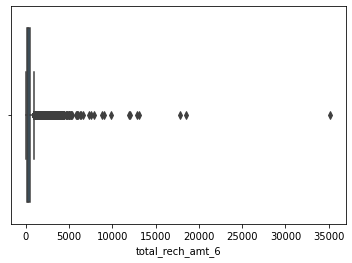

In [197]:
sns.boxplot('total_rech_amt_6',data=df)

In [198]:
date_col_6=df.filter(like='6').columns.values
df[date_col_6][df[date_col_6]['total_rech_amt_6']>25000]

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_og_mou_6  \
38610  27731.088         5.69       3231.81            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
38610              5.69              2.51               0.0               0.0   

       loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
38610          8.21               0.0               0.0               0.0   

       std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  \
38610           0.0       3229.29           0.0          0.0         3237.51   

       loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6  \
38610              6.93              4.56               0.0         11.49   

       std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6  \
38610              2.28               0.0               0.0          2.28   

       total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  \
38610          551.04          0.13        536.99         0.13   

       total_rech_num_6  total_rech_amt_6  max_rech_amt_6  vol_2g_mb_6  \
38610                29             35190            3100          0.0   

       vol_3g_mb_6 monthly_2g_6  sachet_2g_6 monthly_3g_6  sachet_3g_6  vbc_6  
38610          0.0            0            0            0            0    0.0

#If we see high total_rech_amt_6 is because this customer is having high ISD call minutes,hence it is not an outlier

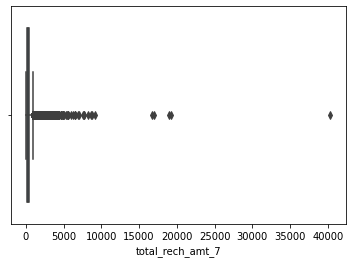

In [199]:
sns.boxplot('total_rech_amt_7',data=df)
    

In [200]:
date_col_7=df.filter(like='7').columns.values
df[date_col_7][df[date_col_7]['total_rech_amt_7']>15000]

arpu_7  onnet_mou_7  offnet_mou_7  roam_ic_mou_7  roam_og_mou_7  \
33019   8609.460         0.00         58.44            0.0            0.0   
38610  35145.834         5.14       3868.59            0.0            0.0   
51314  14624.089         0.00       5490.28            0.0            0.0   
61944  13224.119        50.93        289.89            0.0            0.0   
67717  16820.145        16.61       1921.29            0.0            0.0   

       loc_og_t2t_mou_7  loc_og_t2m_mou_7  loc_og_t2f_mou_7  loc_og_t2c_mou_7  \
33019              0.00             53.86              0.31              0.00   
38610              5.14              0.40              0.00              0.00   
51314              0.00              0.00              0.00              0.00   
61944             47.89            261.46             22.03              0.91   
67717             16.61             14.54              0.00              0.15   

       loc_og_mou_7  std_og_t2t_mou_7  std_og_t2m_mou_7  std_og_t2f_mou_7  \
33019         54.18               0.0              0.00              4.26   
38610          5.54               0.0              0.18              0.00   
51314          0.00               0.0              0.00              0.00   
61944        331.39               0.0              0.00              0.00   
67717         31.16               0.0              2.25              0.00   

       std_og_mou_7  isd_og_mou_7  spl_og_mou_7  og_others_7  total_og_mou_7  \
33019          4.26          0.00          0.00          0.0           58.44   
38610          0.18       3868.01          0.00          0.0         3873.74   
51314          0.00       5490.28          0.00          0.0         5490.28   
61944          0.00       1049.89          9.43          0.0         1390.73   
67717          2.25       1910.73          0.15          0.0         1944.29   

       loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_ic_mou_7  \
33019              0.35             20.81              0.00         21.16   
38610             13.73              2.78              0.00         16.51   
51314              0.00              0.00              0.35          0.35   
61944             88.59             83.28              0.00        171.88   
67717              9.43              8.64              0.00         18.08   

       std_ic_t2t_mou_7  std_ic_t2m_mou_7  std_ic_t2f_mou_7  std_ic_mou_7  \
33019              0.00              0.00               0.0          0.00   
38610              0.00              0.00               0.0          0.00   
51314              3.98              0.00               0.0          3.98   
61944              0.00              0.00               0.0          0.00   
67717              0.71              7.04               0.0          7.76   

       total_ic_mou_7  spl_ic_mou_7  isd_ic_mou_7  ic_others_7  \
33019           21.16          0.00          0.00         0.00   
38610          525.71          0.06        504.01         5.11   
51314            5.71          0.00          1.38         0.00   
61944         1764.64          0.24       1592.24         0.26   
67717          155.96          0.00        130.11         0.00   

       total_rech_num_7  total_rech_amt_7  max_rech_amt_7  vol_2g_mb_7  \
33019                 9             19000            3000         0.00   
38610                17             40335            3100         0.00   
51314                45             16725            1050         0.00   
61944                23             16984            1500         5.53   
67717                26             19204            3100         0.00   

       vol_3g_mb_7 monthly_2g_7  sachet_2g_7  monthly_3g_7  sachet_3g_7  \
33019         0.00            0            0             0            0   
38610         0.00            0            0             0            0   
51314         0.00            0            0             0            0   
61944      2293.91            1            0    

## Step 2: Filter for HVC customers

In [201]:
df.total_rech_amt_6.quantile(0.7)

378.0

In [202]:
df.total_rech_amt_7.quantile(0.7)

370.0

In [203]:
df[['total_rech_amt_6','total_rech_amt_7']].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1])

total_rech_amt_6  total_rech_amt_7
count      99999.000000      99999.000000
mean         327.514615        322.962970
std          398.019701        408.114237
min            0.000000          0.000000
10%            0.000000          0.000000
20%           80.000000         65.000000
30%          120.000000        110.000000
40%          170.000000        160.000000
50%          230.000000        220.000000
60%          290.000000        283.000000
70%          378.000000        370.000000
80%          504.000000        500.000000
90%          732.000000        731.000000
95%          994.000000        993.000000
99%         1683.020000       1728.000000
100%       35190.000000      40335.000000
max        35190.000000      40335.000000

In [0]:
#Finding the average recharge amount for 6th and 7th month 
df['avg_amt'] = round((df['total_rech_amt_6']+ df['total_rech_amt_6'])/2,2)

In [0]:
#we are taking top 30% of the people as high value customers
df_hvc = df[df['avg_amt'] >= df['avg_amt'].quantile(0.7)]

In [206]:
df_hvc=df_hvc.reset_index()
df_hvc.drop('index',axis=1,inplace=True)
df_hvc.shape

(30066, 124)

In [207]:
# Churn Rate
(sum(df_hvc['churn'])/len(df_hvc['churn'].index))*100


10.746358012372779

In [208]:
df_hvc.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7001051193   429.023   190.704   255.114        71.03        45.03   
1     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
2     7001524846   378.721   492.223   137.362       413.69       351.03   
3     7002191713   492.846   205.671   593.260       501.76       108.39   
4     7000875565   430.975   299.869   187.894        50.51        74.01   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0        76.66        262.73         49.24         92.08           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3       534.24        413.31        119.28        482.46          23.53   
4        70.61        296.29        229.74        162.76           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3         144.24          72.11           7.98          35.26           1.44   
4           2.83           0.00           0.00          17.74           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             71.03             45.03             76.14            252.23   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3             49.63              6.19             36.01            151.13   
4             42.61             65.16             67.38            273.29   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             48.71             80.63             10.38              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             47.28            294.46              4.54              0.00   
4            145.99            128.28              0.00              4.48   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.11               0.0              0.00   
1             53.23              0.00               0.0              0.00   
2              0.00              0.00               0.0              7.15   
3             23.51              0.00               0.0              0.49   
4             10.26              0.00               0.0              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        333.64         93.74        156.78              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3        205.31         53.48        353.99            446.41   
4        315.91        215.64        205.93              7.89   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.51              0.00              0.53   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3             85.98            498.23            255.36             52.94   
4              2.58              3.23             22.99             64.51   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             11.45              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            156.94              0.00              0.00        

 We got 30k assocaites as mentioned in the Problem statement, with churn rate of 10%. So far our approach is correct

### Outlier detection of HVC Customer

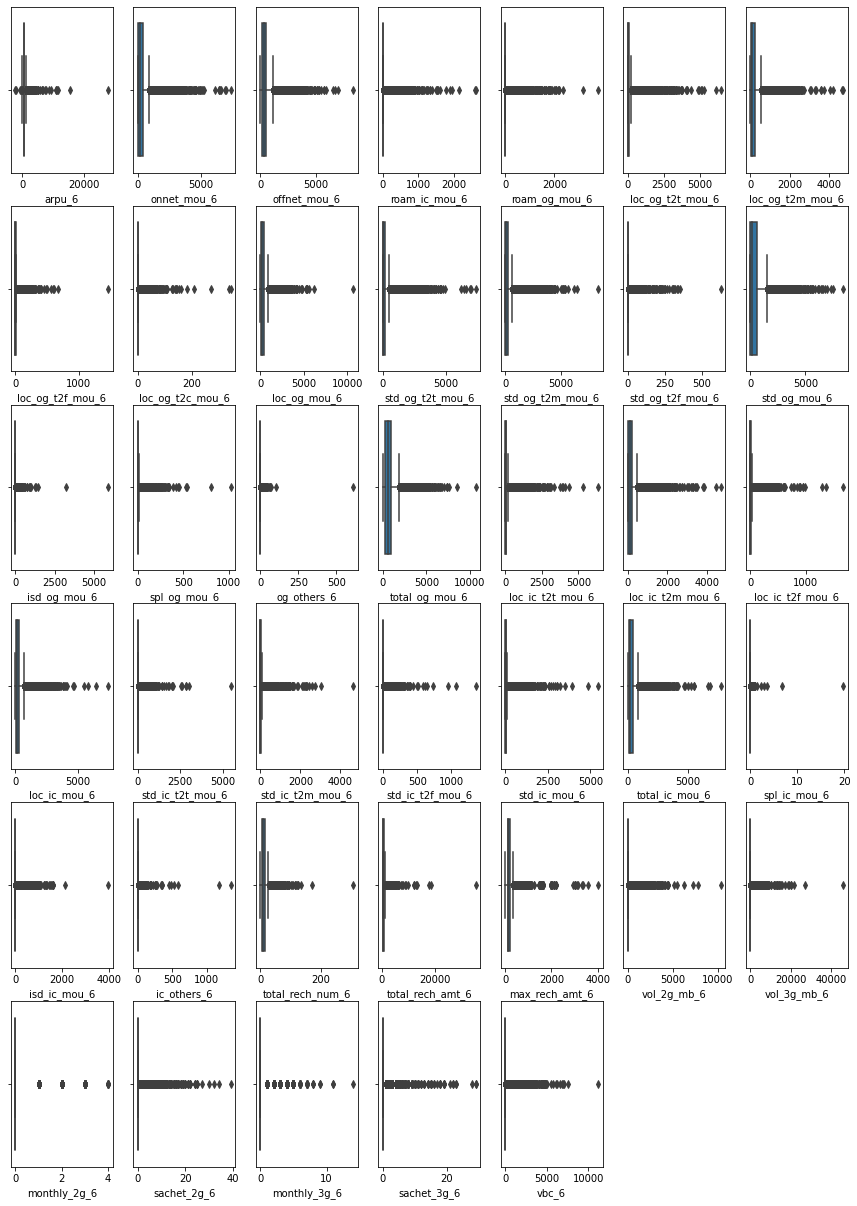

In [209]:
date_col_6=df_hvc.filter(like='6').columns.values
i=1
plt.figure(figsize=(15,25))
for col in date_col_6:
    plt.subplot(7,7,i)
    sns.boxplot(col,data=df_hvc)
    i=i+1
    

In [210]:
df_hvc[date_col_6].describe(percentiles=[0.01,0.1,0.25,0.5,0.7,0.90,0.95,0.99])

arpu_6   onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_og_mou_6  \
count  30066.000000  30066.000000  30066.000000   30066.000000   30066.000000   
mean     604.943822    305.789112    429.322232      17.503626      29.971018   
std      429.061157    461.825799    468.092073      78.721871     119.249848   
min    -2258.709000      0.000000      0.000000       0.000000       0.000000   
1%       175.780700      0.000000      0.000000       0.000000       0.000000   
10%      328.878500     12.310000     63.730000       0.000000       0.000000   
25%      387.682000     44.265000    147.540000       0.000000       0.000000   
50%      500.841500    134.000000    296.350000       0.000000       0.000000   
70%      645.981500    300.375000    474.050000       0.000000       0.000000   
90%      990.649500    807.345000    922.595000      33.340000      68.450000   
95%     1239.233500   1155.820000   1270.467500      95.425000     173.810000   
99%     1982.701750   2165.160000   2325.419500     348.158000     548.520000   
max    27731.088000   7376.710000   8362.360000    2613.310000    3775.110000   

       loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
count      30066.000000      30066.000000      30066.000000      30066.000000   
mean          95.537409        183.198631          6.898041          1.631636   
std          237.193512        249.295342         22.549635          6.944588   
min            0.000000          0.000000          0.000000          0.000000   
1%             0.000000          0.000000          0.000000          0.000000   
10%            1.410000          8.585000          0.000000          0.000000   
25%            9.280000         33.015000          0.000000          0.000000   
50%           33.510000        103.320000          0.380000          0.000000   
70%           74.620000        205.180000          3.430000          0.000000   
90%          209.070000        436.730000         17.920000          4.300000   
95%          350.295000        614.715000         32.910000          8.980000   
99%         1079.367500       1136.988000         89.830000         25.102000   
max         6431.330000       4729.740000       1466.030000        342.860000   

       loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
count  30066.000000       30066.00000      30066.000000      30066.000000   
mean     285.643030         198.40894        211.978232          2.008117   
std      378.608008         412.87522        416.322737         12.312988   
min        0.000000           0.00000          0.000000          0.000000   
1%         0.000000           0.00000          0.000000          0.000000   
10%       16.220000           0.00000          0.000000          0.000000   
25%       55.710000           0.00000          1.952500          0.000000   
50%      169.560000          15.18500         42.360000          0.000000   
70%      325.335000         129.92000        167.460000          0.000000   
90%      660.395000         658.96000        639.935000          2.200000   
95%      929.625000         991.42250        973.150000          8.240000   
99%     1821.375500        1884.58200       1953.423000         45.257500   
max    10643.380000        7366.58000       8314.760000        628.560000   

       std_og_mou_6  isd_og_mou_6  spl_og_mou_6   og_others_6  total_og_mou_6  \
count  30066.000000  30066.000000  30066.000000  30066.000000    30066.000000   
mean     412.399694      2.271497      6.215179      0.760700      707.300174   
std      607.123708     45.865214     19.096163      4.228605      651.800149   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
1%         0.000000      0.000000      0.000000      0.000000        0.000000   
10%        0.000000      0.000000      0.000000      0.000000      124.795000   
25%        6.860000      0.000000      0.000000      0.000000      294.032500   
50%      147.275

In [211]:
df_out_6=df_hvc[(df_hvc['arpu_6'] <0) & (df_hvc['total_rech_amt_6']!=0)]
df_out_6[date_col_6].head()

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_og_mou_6  \
246  -160.795         0.86        604.14           6.11           0.00   
325   -67.930        32.48         60.78          35.29           3.88   
544   -71.946         5.98         46.06           0.00           0.00   
840   -88.306         2.08          3.60           0.00           0.00   
854 -2041.228      1501.31       4104.01           0.00           0.00   

     loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
246              0.00              7.81              0.00              0.00   
325              5.25              0.00              0.00              0.00   
544              5.98             46.06              0.00              0.00   
840              2.08              0.90              0.00              0.00   
854            418.76           2653.43             17.59              5.64   

     loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
246          7.81              0.86            596.33              0.00   
325          5.25             24.00             60.13              0.00   
544         52.04              0.00              0.00              0.00   
840          2.98              0.00              0.00              0.00   
854       3089.79           1082.54           1413.83             13.49   

     std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6  \
246        597.19           0.0          0.00          0.0          605.01   
325         84.13           0.0          0.00          0.0           89.38   
544          0.00           0.0          0.00          0.0           52.04   
840          0.00           0.0          2.70          0.0            5.68   
854       2509.88           0.0          5.64          0.0         5605.33   

     loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6  \
246              0.00             11.58              0.00         11.58   
325              0.70              0.00              0.46          1.16   
544              0.30             40.89             10.46         51.66   
840             19.39             13.91              0.00         33.31   
854              5.46             39.93              0.00         45.39   

     std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6  \
246              2.51            211.08               0.0        213.59   
325              0.00              1.53               0.0          1.53   
544              0.00              1.53               0.0          1.53   
840              0.00              0.00               0.0          0.00   
854              5.56             14.41               0.0         19.98   

     total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  \
246          225.18           0.0           0.0          0.0   
325            2.69           0.0           0.0          0.0   
544           53.19           0.0           0.0          0.0   
840           33.31           0.0           0.0          0.0   
854           65.38           0.0           0.0          0.0   

     total_rech_num_6  total_rech_amt_6  max_rech_amt_6  vol_2g_mb_6  \
246                 6              2199            1000          0.0   
325                 6               547             547          0.0   
544                 3               619             619          0.0   
840                 2               550             550          0.0   
854                 3              5021            3010          0.0   

     vol_3g_mb_6 monthly_2g_6  sachet_2g_6 monthly_3g_6  sachet_3g_6   vbc_6  
246          0.0            0            0            0            0    0.00  
325          0.0            0            0            0            0  403.82  
544          0.0            0            0            0            0    0.00  
840          0.0            0            0            0            0    0.00  
854          0.0            0            0          

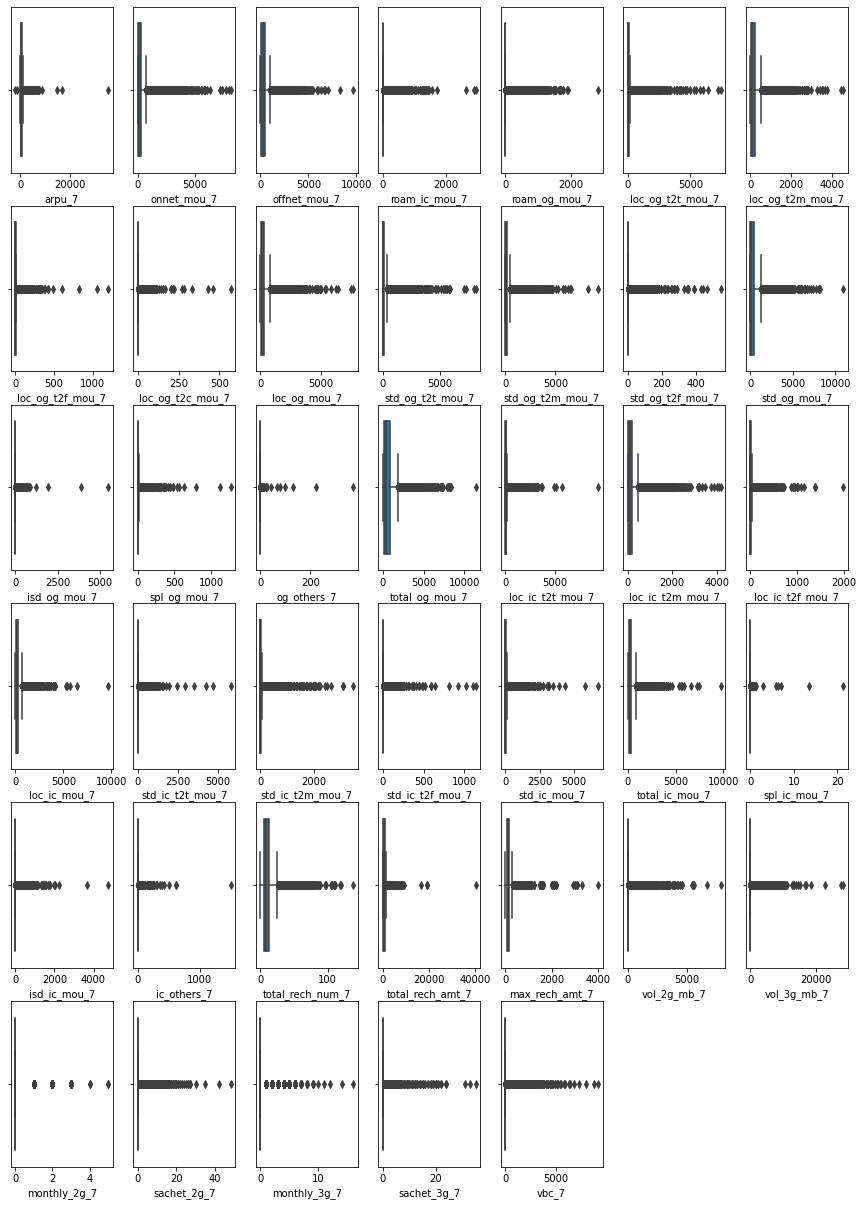

In [212]:
date_col_7=df_hvc.filter(like='7').columns.values
i=1
plt.figure(figsize=(15,25))
for col in date_col_7:
    plt.subplot(7,7,i)
    sns.boxplot(col,data=df_hvc)
    i=i+1
    

In [213]:
df_out_7=df_hvc[(df_hvc['arpu_7'] <0) & (df_hvc['total_rech_amt_7']!=0)]
df_out_7[date_col_7].head()

arpu_7  onnet_mou_7  offnet_mou_7  roam_ic_mou_7  roam_og_mou_7  \
175  -2014.045      1384.58       4211.83            0.0           0.00   
176    -28.543         0.00          1.26            0.0           1.26   
2808   -72.346         0.16         14.91            0.0           0.00   
3027   -78.780         0.00          0.00            0.0           0.00   
3826   -92.766       669.91       2073.34            0.0           0.00   

      loc_og_t2t_mou_7  loc_og_t2m_mou_7  loc_og_t2f_mou_7  loc_og_t2c_mou_7  \
175             346.96           1932.11            139.73             19.04   
176               0.00              0.00              0.00              0.00   
2808              0.16             14.91              0.00              0.00   
3027              0.00              0.00              0.00              0.00   
3826            162.21           1338.39             60.73              0.00   

      loc_og_mou_7  std_og_t2t_mou_7  std_og_t2m_mou_7  std_og_t2f_mou_7  \
175        2418.81           1037.23           2104.64             15.21   
176           0.00              0.00              0.00              0.00   
2808         15.08              0.00              0.00              0.00   
3027          0.00              0.00              0.00              0.00   
3826       1561.34            507.69            658.59             15.61   

      std_og_mou_7  isd_og_mou_7  spl_og_mou_7  og_others_7  total_og_mou_7  \
175        3157.09          1.45         19.04          0.0         5596.41   
176           0.00          0.00          0.00          0.0            0.00   
2808          0.00          0.00          0.16          0.0           15.24   
3027          0.00          0.00          0.00          0.0            0.00   
3826       1181.91          0.00          0.00          0.0         2743.26   

      loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_ic_mou_7  \
175              17.74             30.94              0.16         48.86   
176               0.00              0.00              0.00          0.00   
2808              3.68            129.23              1.68        134.59   
3027              0.00             78.43              9.66         88.09   
3826              0.16              2.44              0.03          2.64   

      std_ic_t2t_mou_7  std_ic_t2m_mou_7  std_ic_t2f_mou_7  std_ic_mou_7  \
175               7.43              7.79               0.0         15.23   
176               0.00              0.00               0.0          0.00   
2808              0.00              0.00               0.0          0.00   
3027             60.08              0.00               0.0         60.08   
3826              0.03              2.81               0.0          2.84   

      total_ic_mou_7  spl_ic_mou_7  isd_ic_mou_7  ic_others_7  \
175            64.09           0.0           0.0          0.0   
176             0.00           0.0           0.0          0.0   
2808          134.59           0.0           0.0          0.0   
3027          148.28           0.0           0.0          0.1   
3826            5.49           0.0           0.0          0.0   

      total_rech_num_7  total_rech_amt_7  max_rech_amt_7  vol_2g_mb_7  \
175                  2              5011            4010          0.0   
176                  4               110             110          0.0   
2808                 2               550             550          0.0   
3027                 1               351             351          0.0   
3826                 3              1866            1010          0.0   

      vol_3g_mb_7 monthly_2g_7  sachet_2g_7  monthly_3g_7  sachet_3g_7   vbc_7  
175           0.0            0            0             0            0    0.00  
176           0.0            0            0             0            0    0.00  
2808          0.0            0            0             0            0  152.96  
3027          0.0            0            0             0            0    0.

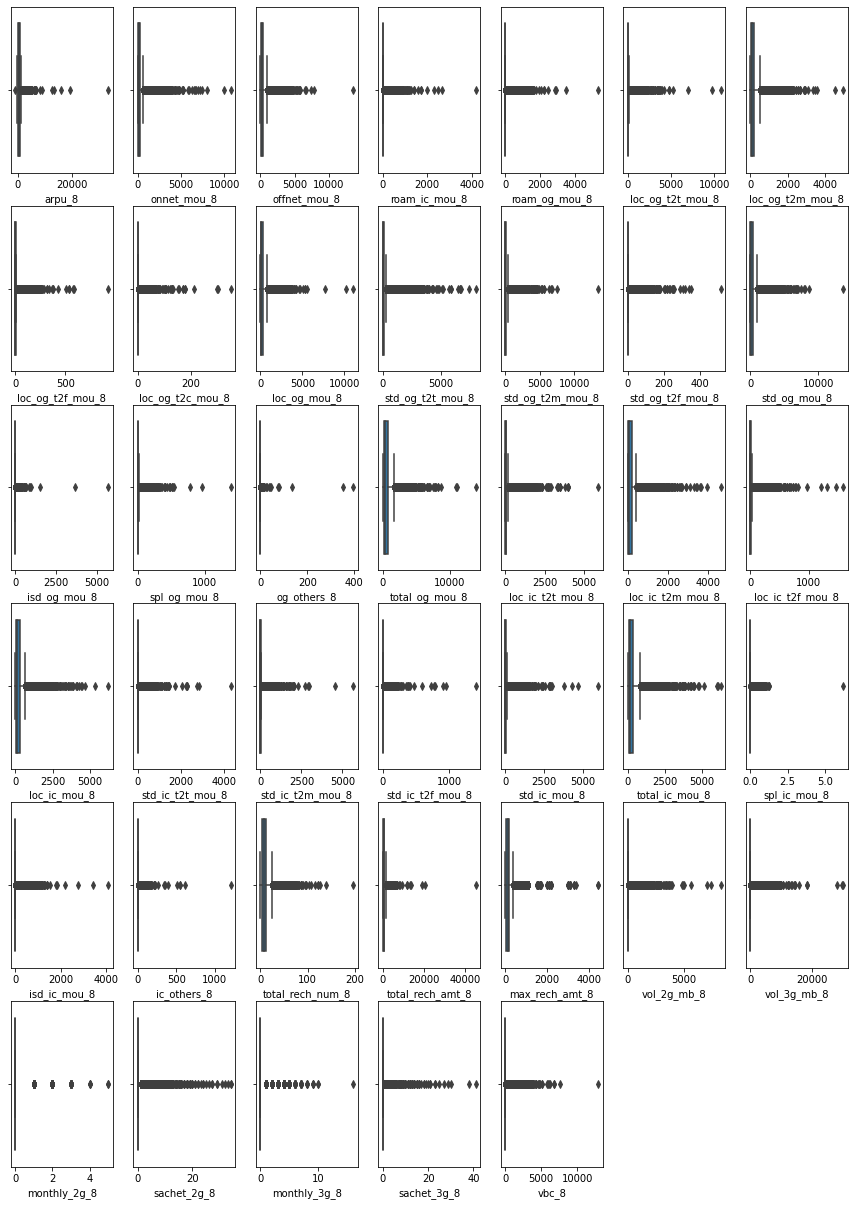

In [214]:
date_col_8=df_hvc.filter(like='8').columns.values
i=1
plt.figure(figsize=(15,25))
for col in date_col_8:
    plt.subplot(7,7,i)
    sns.boxplot(col,data=df_hvc)
    i=i+1
    

In [215]:
df_out_8=df_hvc[(df_hvc['arpu_8'] <0) & (df_hvc['total_rech_amt_8']!=0)]
df_out_8[date_col_8].head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
854  -945.808      1722.39       5738.13            0.0            0.0   
986  -146.859        39.14        268.29            0.0            0.0   
3842  -50.243         0.00          1.20            0.0            0.0   
4596 -345.129         2.56         10.71            0.0            0.0   
5344   -4.410         1.01         13.91            0.0            0.0   

      loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
854             543.49           4524.59              5.74              9.76   
986              34.74            184.51             26.44              0.00   
3842              0.00              1.20              0.00              0.00   
4596              0.00              9.60              1.11              0.00   
5344              0.51              3.71              0.00              0.00   

      loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
854        5073.84           1178.89           1187.96              9.71   
986         245.71              4.39             52.96              4.36   
3842          1.20              0.00              0.00              0.00   
4596         10.71              2.56              0.00              0.00   
5344          4.23              0.50             10.19              0.00   

      std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
854        2376.58           0.0         10.09          0.0         7460.53   
986          61.73           0.0          0.00          0.0          307.44   
3842          0.00           0.0          0.56          0.0            1.76   
4596          2.56           0.0          0.00          0.0           13.28   
5344         10.69           0.0          1.86          0.0           16.79   

      loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
854              11.51             48.28              0.00         59.79   
986              40.94            199.46             27.46        267.88   
3842              1.39            139.19             30.18        170.78   
4596              0.00              0.00              0.00          0.00   
5344              5.14              2.33              0.00          7.48   

      std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
854               3.24              5.39              0.00          8.64   
986               4.73            213.43             10.03        228.19   
3842              0.00              0.00              0.00          0.00   
4596              0.00              0.00              0.00          0.00   
5344              1.11              0.00              0.00          1.11   

      total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
854            68.61           0.0          0.00         0.16   
986           496.08           0.0          0.00         0.00   
3842          189.51           0.0          1.76        16.96   
4596            0.00           0.0          0.00         0.00   
5344            8.60           0.0          0.00         0.00   

      total_rech_num_8  total_rech_amt_8  max_rech_amt_8  vol_2g_mb_8  \
854                  3              5021            3010         0.00   
986                  5              5490            2000        20.41   
3842                 2               350             350         0.00   
4596                 1               505             505         0.00   
5344                 4               130             130         0.00   

      vol_3g_mb_8 monthly_2g_8  sachet_2g_8 monthly_3g_8  sachet_3g_8  vbc_8  
854          0.00            0            0            0            0    0.0  
986       1299.38            0            0            1            0    0.0  
3842         0.00            0            0            0            0    0.0  
4596         0.00            0            0            0            0    0.0  
5344      

In [0]:
#if we consider above distribution in all the three months, if total reacharge is positive still the revenue is negetive in corresponding months,
#we will consider that data as outlier, and will treat it 

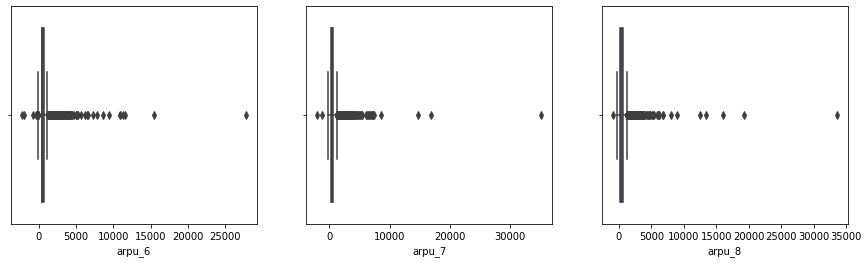

In [217]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot('arpu_6',data=df_hvc)
plt.subplot(1,3,2)
sns.boxplot('arpu_7',data=df_hvc)
plt.subplot(1,3,3)
sns.boxplot('arpu_8',data=df_hvc)

In [0]:
#imputing outlier with np.nan
df_hvc['arpu_8'] = np.where((df_hvc['arpu_8'] <0) & (df_hvc[date_col_8]['total_rech_amt_8']!=0),np.nan,df_hvc['arpu_8'])
df_hvc['arpu_7'] = np.where((df_hvc['arpu_7'] <0) & (df_hvc[date_col_7]['total_rech_amt_7']!=0),np.nan,df_hvc['arpu_7'])
df_hvc['arpu_6'] = np.where((df_hvc['arpu_6'] <0) & (df_hvc[date_col_6]['total_rech_amt_6']!=0),np.nan,df_hvc['arpu_6'])

In [219]:
round(100*(df_hvc.isna().sum()/len(df_hvc)),2).sort_values(ascending=False)

arpu_6              0.13
arpu_7              0.06
arpu_8              0.06
avg_amt             0.00
std_og_t2f_mou_8    0.00
isd_og_mou_7        0.00
isd_og_mou_6        0.00
std_og_mou_8        0.00
std_og_mou_7        0.00
std_og_mou_6        0.00
std_og_t2f_mou_6    0.00
std_og_t2f_mou_7    0.00
spl_og_mou_6        0.00
std_og_t2m_mou_8    0.00
std_og_t2m_mou_7    0.00
std_og_t2m_mou_6    0.00
isd_og_mou_8        0.00
spl_og_mou_8        0.00
spl_og_mou_7        0.00
std_og_t2t_mou_7    0.00
og_others_6         0.00
og_others_7         0.00
og_others_8         0.00
total_og_mou_6      0.00
total_og_mou_7      0.00
total_og_mou_8      0.00
loc_ic_t2t_mou_6    0.00
loc_ic_t2t_mou_7    0.00
loc_ic_t2t_mou_8    0.00
loc_ic_t2m_mou_6    0.00
loc_ic_t2m_mou_7    0.00
std_og_t2t_mou_8    0.00
loc_og_mou_8        0.00
std_og_t2t_mou_6    0.00
loc_og_t2t_mou_6    0.00
onnet_mou_6         0.00
onnet_mou_7         0.00
onnet_mou_8         0.00
offnet_mou_6        0.00
offnet_mou_7        0.00


In [0]:
#we will use iterative imputer to impute these values

from fancyimpute import IterativeImputer
data_columns=df_hvc.columns
ii=IterativeImputer()
dataff=ii.fit_transform(df_hvc)

In [221]:
df_hvc_imp=pd.DataFrame(dataff)
df_hvc_imp.columns=data_columns
df_hvc_imp['mobile_number']=df_hvc['mobile_number']
df_hvc=df_hvc_imp
df_hvc.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7001051193   429.023   190.704   255.114        71.03        45.03   
1     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
2     7001524846   378.721   492.223   137.362       413.69       351.03   
3     7002191713   492.846   205.671   593.260       501.76       108.39   
4     7000875565   430.975   299.869   187.894        50.51        74.01   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0        76.66        262.73         49.24         92.08           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3       534.24        413.31        119.28        482.46          23.53   
4        70.61        296.29        229.74        162.76           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3         144.24          72.11           7.98          35.26           1.44   
4           2.83           0.00           0.00          17.74           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             71.03             45.03             76.14            252.23   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3             49.63              6.19             36.01            151.13   
4             42.61             65.16             67.38            273.29   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             48.71             80.63             10.38              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             47.28            294.46              4.54              0.00   
4            145.99            128.28              0.00              4.48   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.11               0.0              0.00   
1             53.23              0.00               0.0              0.00   
2              0.00              0.00               0.0              7.15   
3             23.51              0.00               0.0              0.49   
4             10.26              0.00               0.0              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        333.64         93.74        156.78              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3        205.31         53.48        353.99            446.41   
4        315.91        215.64        205.93              7.89   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.51              0.00              0.53   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3             85.98            498.23            255.36             52.94   
4              2.58              3.23             22.99             64.51   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             11.45              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            156.94              0.00              0.00        

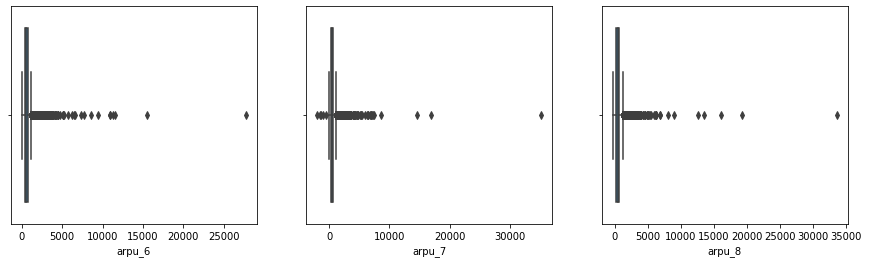

In [222]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot('arpu_6',data=df_hvc)
plt.subplot(1,3,2)
sns.boxplot('arpu_7',data=df_hvc)
plt.subplot(1,3,3)
sns.boxplot('arpu_8',data=df_hvc)

In [223]:
round(100*(df.isna().sum()/len(df)),2).sort_values(ascending=False)

avg_amt             0.0
isd_og_mou_8        0.0
std_og_t2t_mou_7    0.0
std_og_t2t_mou_8    0.0
std_og_t2m_mou_6    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_8    0.0
std_og_t2f_mou_6    0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
std_og_mou_8        0.0
isd_og_mou_6        0.0
isd_og_mou_7        0.0
spl_og_mou_6        0.0
churn               0.0
spl_og_mou_7        0.0
spl_og_mou_8        0.0
og_others_6         0.0
og_others_7         0.0
og_others_8         0.0
total_og_mou_6      0.0
total_og_mou_7      0.0
total_og_mou_8      0.0
loc_ic_t2t_mou_6    0.0
loc_ic_t2t_mou_7    0.0
loc_ic_t2t_mou_8    0.0
loc_ic_t2m_mou_6    0.0
loc_ic_t2m_mou_7    0.0
std_og_t2t_mou_6    0.0
loc_og_mou_8        0.0
loc_og_mou_7        0.0
loc_og_mou_6        0.0
arpu_6              0.0
arpu_7              0.0
arpu_8              0.0
onnet_mou_6         0.0
onnet_mou_7         0.0
onnet_mou_8         0.0
offnet_mou_6        0.0
offnet_mou_7    

## Step 4: EDA, Derived Metrics

In [224]:
#we are deriving new column age_class based on column 'aon'
df_hvc['age_class'] = pd.cut(df_hvc.aon, bins = [180,500, 1000, 1500, 2500, 3500, 4000], labels = ['New_Conn','1y','3y','6y','10y','>10y'])
df_hvc.age_class.value_counts()

New_Conn    8739
1y          7479
6y          4762
3y          4330
10y         3990
>10y         728
Name: age_class, dtype: int64

In [0]:
#will drop aon column since we have derived catagorical column out of it
df_hvc.drop('aon',axis=1,inplace=True)

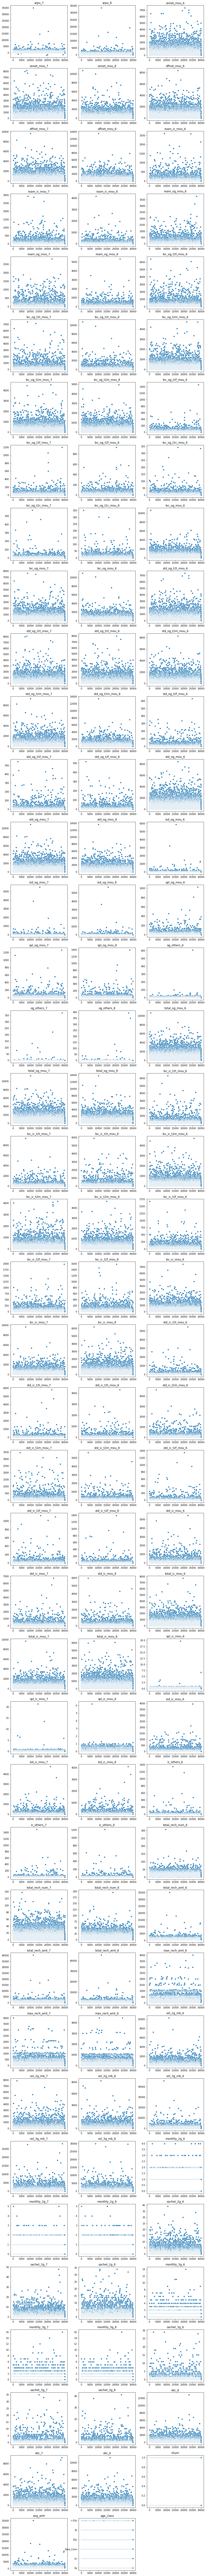

In [226]:
i=1
plt.figure(figsize=(15,250))
for col in df_hvc.columns[2:]:
    plt.subplot(50,3,i)
    sns.scatterplot(data=df_hvc[col])
    plt.title(col)
    i=i+1

In [0]:
df_hvc['age_class']=df_hvc['age_class'].astype('object')

In [228]:
df_hvc.groupby(['age_class'])['churn'].sum()

age_class
10y          164.0
1y          1024.0
3y           359.0
6y           269.0
>10y          25.0
New_Conn    1385.0
Name: churn, dtype: float64

In [0]:
#we can see that clients they are new to service, like less then 1 year are getting churned more.

In [0]:
df_hvc['total_amt_diff'] = df_hvc.total_rech_amt_8 - ((df_hvc.total_rech_amt_6 + df_hvc.total_rech_amt_7)/2)

In [0]:
# Plot for variables

def plot_continuous_variable_boxPlot(df,param):
    
    not_churned_df = df_hvc[df_hvc.churn == 0]
    churned_df = df_hvc[df_hvc.churn == 1]
    
    plt.figure(figsize=(10,6)) 
    plt.subplot(1,2,1)
    sns.boxplot(y=not_churned_df[param])
    plt.title(param +' distribution for Not Churned ',fontsize=10)
    
    plt.subplot(1,2,2)
    sns.boxplot(y=churned_df[param])
    plt.title(param +' distribution for Churned ',fontsize=10)
    plt.show()

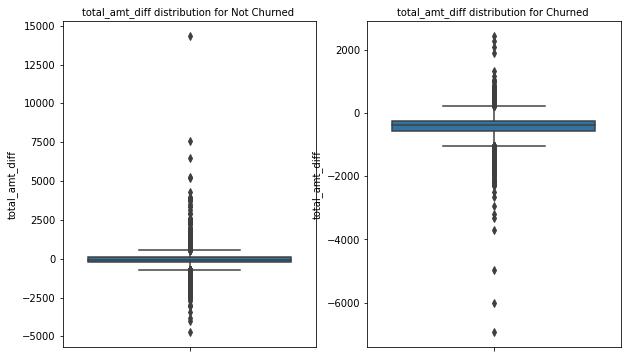

In [232]:
plot_continuous_variable_boxPlot(df_hvc[['churn','total_amt_diff']],'total_amt_diff')

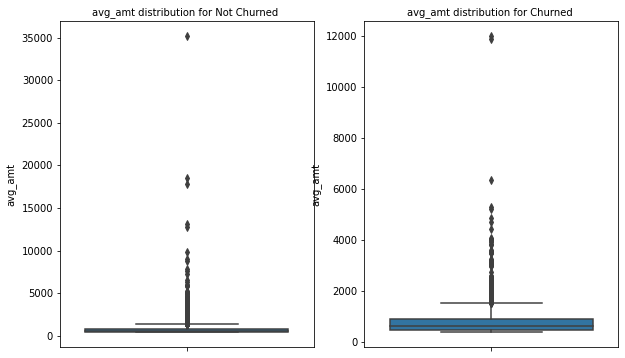

In [233]:
plot_continuous_variable_boxPlot(df_hvc[['churn','avg_amt']],'avg_amt')

No handles with labels found to put in legend.


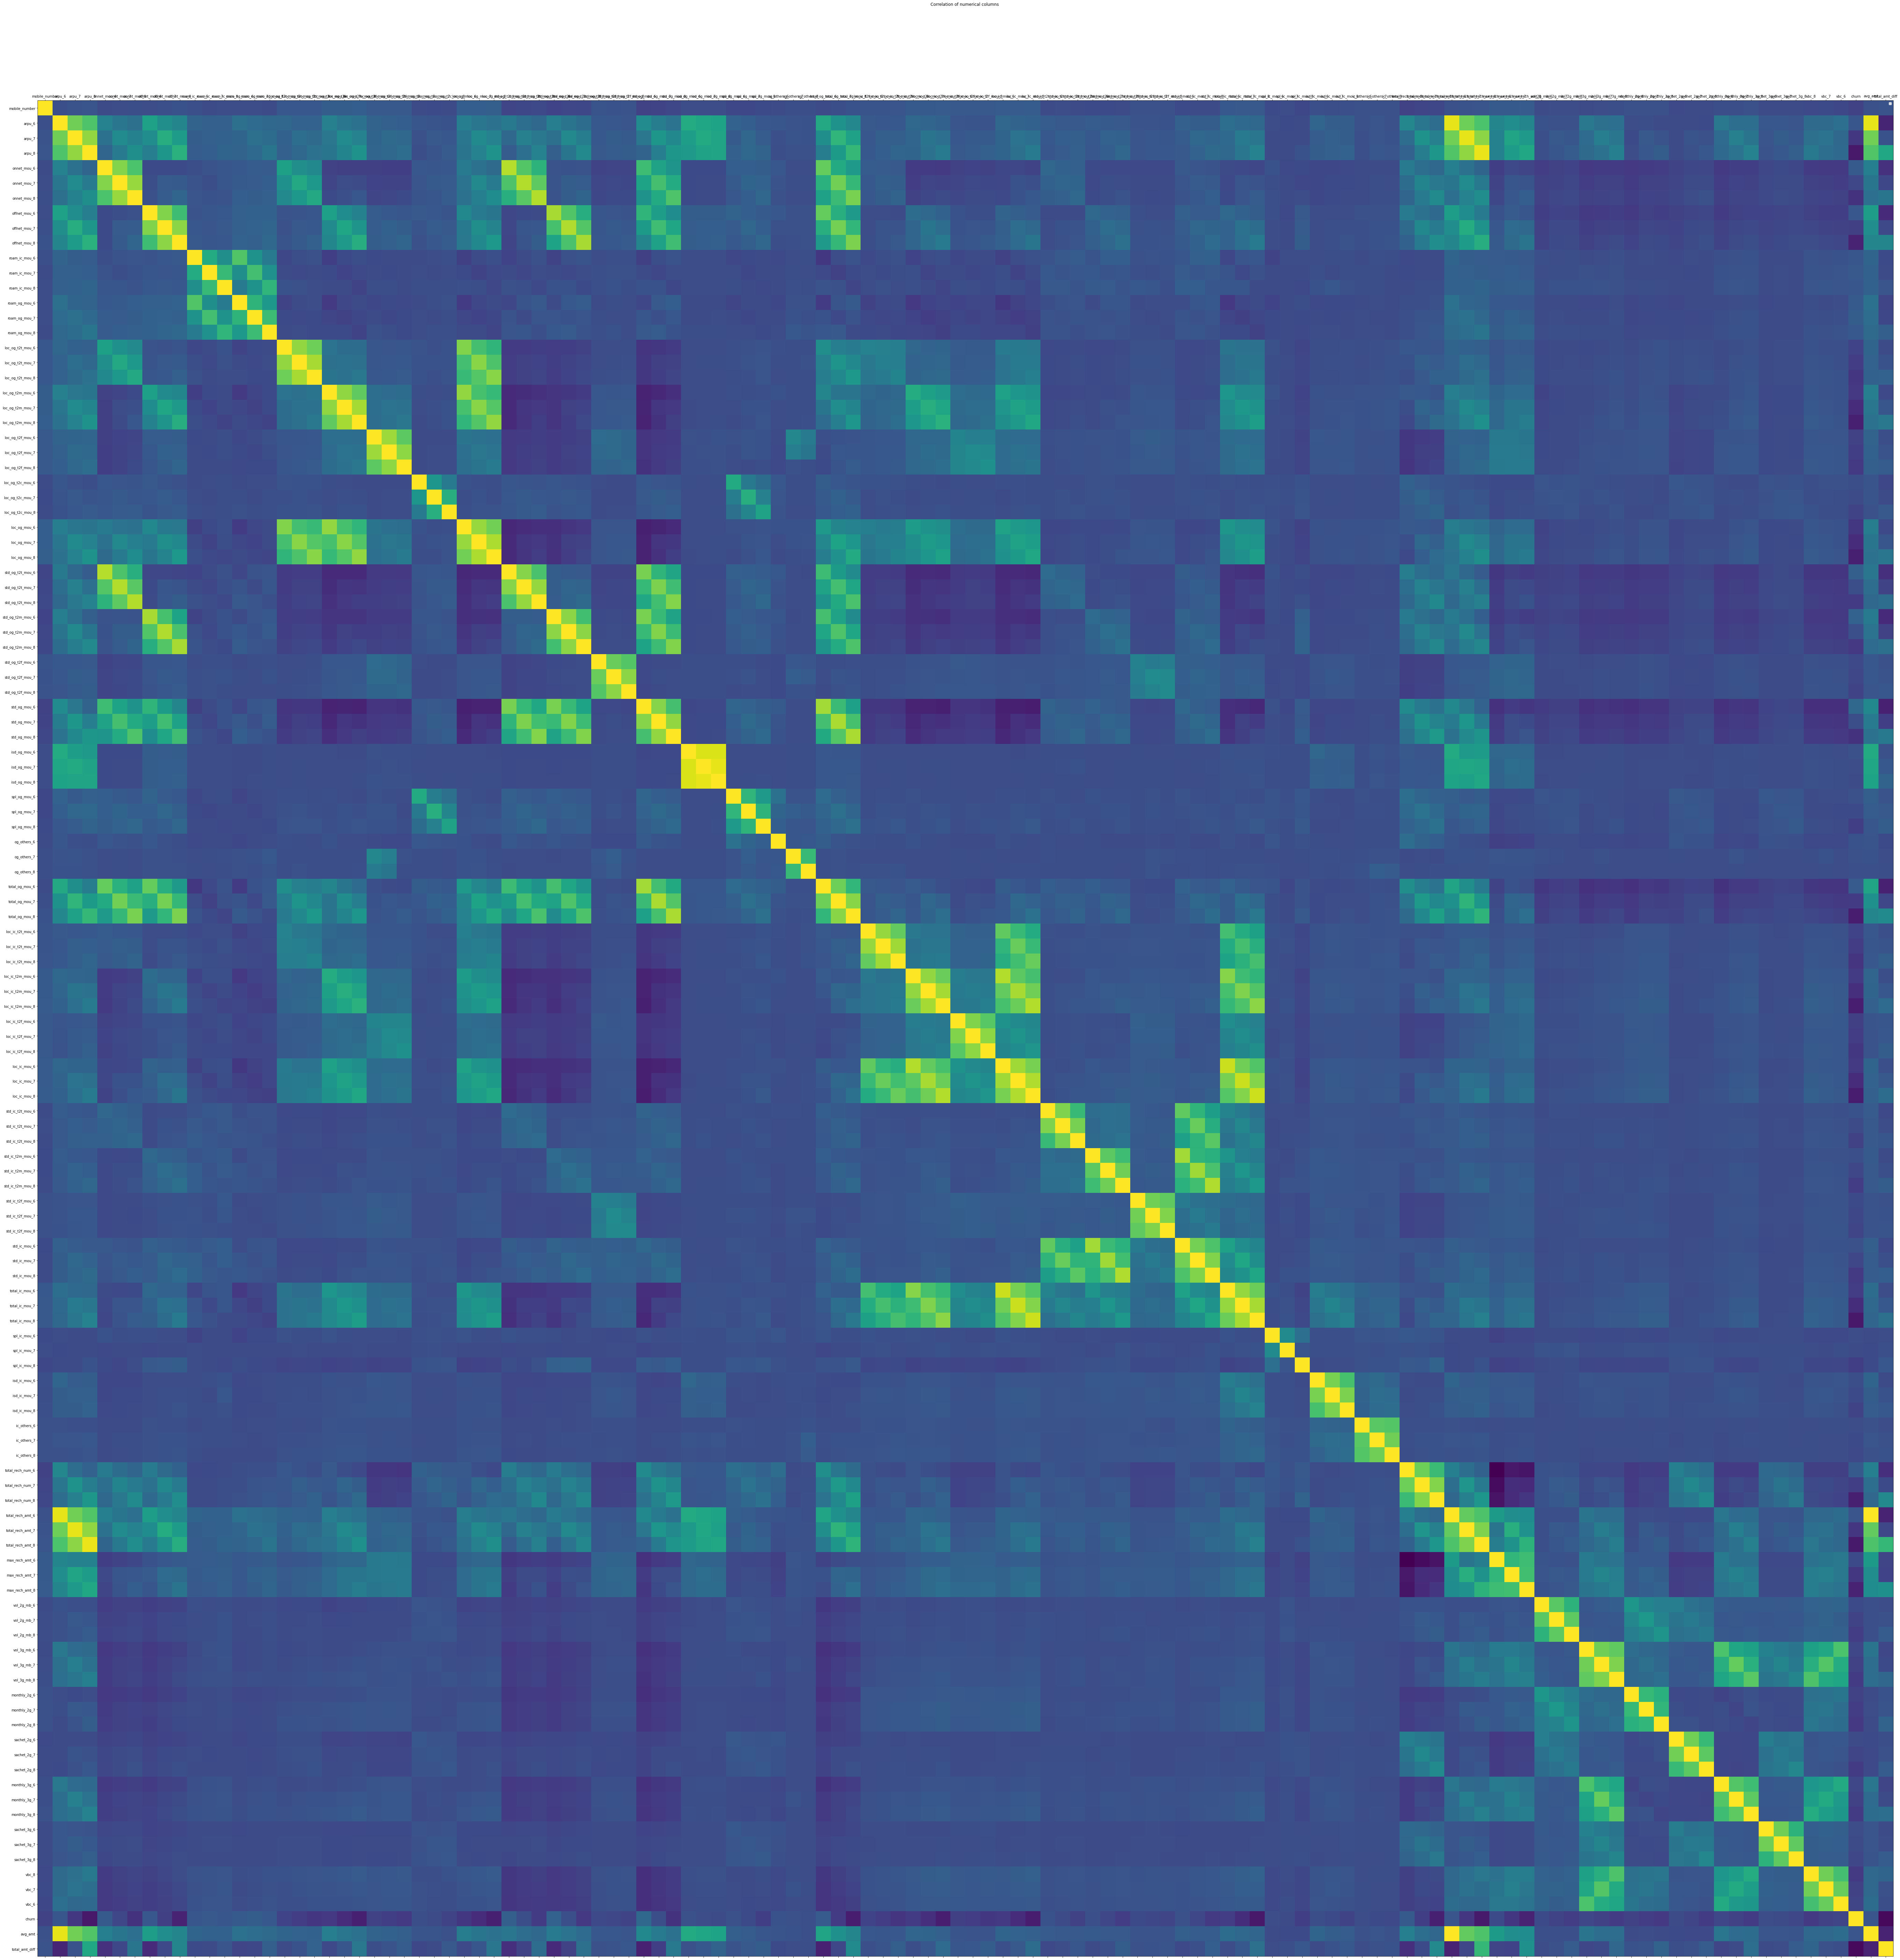

In [234]:
numeric = df_hvc._get_numeric_data().corr()


fig, ax = plt.subplots(figsize=(120, 100))
ax.matshow(numeric)
plt.xticks(range(len(numeric.columns)), numeric.columns)
plt.yticks(range(len(numeric.columns)), numeric.columns)
ax.legend()
plt.title('Correlation of numerical columns ')
plt.show()

### Let's create some more variables and use some pivot tables to impute values

## Step 5: Data Preparation for modelling

In [0]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [0]:
#Creating dummy variables for catagorical columns
df_dummies=pd.get_dummies(df_hvc['age_class'],drop_first=True)
df_hvc=pd.concat([df_hvc,df_dummies],axis=1)
df_hvc.drop('age_class',axis=1,inplace=True)

In [0]:
#Splitting data in to train and test
y_data=df_hvc['churn']
x_data=df_hvc.drop('churn',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,train_size=0.7,random_state = 4, stratify = y_data)

In [238]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21046, 128)
(21046,)
(9020, 128)
(9020,)


In [239]:
y_train.sum()/len(y_train)

0.10747885583958947

Since data is imbalance we will use SMOTE techhinque to over sample the data

In [0]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x_train)
x_scaled_train=pd.DataFrame(x_scaled)
x_scaled_train.columns=x_train.columns

x_scaled=scaler.transform(x_test)
x_scaled_test=pd.DataFrame(x_scaled)
x_scaled_test.columns=x_test.columns
x_test=x_scaled_test

#smote to balance the data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=23, sampling_strategy=0.5)
x_balaned_train, y_balanced_train = sm.fit_resample(x_scaled_train, y_train.astype('int'))


In [241]:
y_balanced_train.sum()/len(y_balanced_train)

0.3333333333333333

In [242]:

print(x_balaned_train.shape)
print(y_balanced_train.shape)

(28176, 128)
(28176,)


In [0]:
x_balaned_train=pd.DataFrame(x_balaned_train)
x_balaned_train.columns=x_train.columns

## Model for picking good variables without PCA

In [0]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [245]:
# fit model
model.fit(x_balaned_train, y_balanced_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 12.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                   

In [246]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9825888302258166
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [247]:
# predict churn on test data
y_pred = model.predict(x_test)

acc_score = metrics.accuracy_score(y_test, y_pred)
print(acc_score)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model.predict_proba(x_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

0.933370288248337
[[7733  318]
 [ 283  686]]
AUC:    	 0.94


In [0]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [249]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7079463364293086

In [250]:
# Let us calculate specificity
TN / float(TN+FP)

0.960501801018507

Model with out PCA is giving good accuracy and sensitivity

Let's check the importance of variables and pick best variables

In [254]:
### Feature Importance

# predictors
features = x_balaned_train.columns

# feature_importance
importance = model.best_estimator_.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance


Sum of importance= 100.0


variables  importance_percentage
0      total_ic_mou_8               4.693945
1       roam_og_mou_8               4.563571
2        loc_ic_mou_8               4.453911
3    loc_ic_t2m_mou_8               3.644599
4       roam_ic_mou_8               3.566401
5      total_amt_diff               3.544909
6              arpu_8               3.369003
7    loc_og_t2m_mou_8               3.207695
8      total_og_mou_8               3.040246
9    loc_ic_t2t_mou_8               2.824905
10   total_rech_amt_8               2.760592
11       loc_og_mou_8               2.205396
12       std_ic_mou_8               2.028280
13     max_rech_amt_8               1.963070
14       offnet_mou_8               1.539271
15   total_rech_num_8               1.392472
16   loc_og_t2t_mou_8               1.316561
17        onnet_mou_8               1.292691
18   loc_ic_t2f_mou_8               1.261379
19   std_ic_t2m_mou_8               1.116078
20   loc_og_t2f_mou_8               0.966915
21       std_og_mou_8               0.895091
22   std_og_t2m_mou_8               0.867774
23       loc_og_mou_7               0.865357
24       loc_ic_mou_7               0.853834
25       spl_og_mou_7               0.828455
26        vol_3g_mb_8               0.785730
27   loc_ic_t2m_mou_7               0.762790
28             arpu_7               0.735738
29   total_rech_num_7               0.715528
30   std_og_t2t_mou_6               0.700445
31   total_rech_amt_7               0.699368
32      mobile_number               0.679244
33             arpu_6               0.679114
34   loc_og_t2m_mou_7               0.664304
35        vol_2g_mb_8               0.654943
36            avg_amt               0.653416
37     total_ic_mou_7               0.649990
38        onnet_mou_6               0.641203
39   std_ic_t2t_mou_6               0.634080
40     total_og_mou_7               0.629635
41   total_rech_num_6               0.626073
42   loc_og_t2m_mou_6               0.621788
43       std_og_mou_7               0.619695
44       std_og_mou_6               0.619142
45   std_ic_t2m_mou_6               0.618348
46   loc_ic_t2t_mou_6               0.600202
47   std_og_t2m_mou_6               0.597015
48   total_rech_amt_6               0.595274
49   loc_og_t2t_mou_7               0.591013
50        onnet_mou_7               0.588400
51       loc_ic_mou_6               0.586854
52   loc_ic_t2m_mou_6               0.586534
53       std_ic_mou_6               0.583636
54   loc_og_t2t_mou_6               0.578790
55      roam_ic_mou_7               0.574093
56       offnet_mou_6               0.569089
57   loc_ic_t2t_mou_7               0.560363
58     total_ic_mou_6               0.551967
59     max_rech_amt_7               0.551654
60     total_og_mou_6               0.551205
61      roam_og_mou_7               0.550650
62       offnet_mou_7               0.547321
63       loc_og_mou_6               0.545204
64       std_ic_mou_7               0.541614
65       spl_og_mou_8               0.538406
66       spl_og_mou_6               0.520886
67   std_og_t2t_mou_7               0.513446
68        ic_others_6               0.499957
69   std_ic_t2m_mou_7               0.494346
70   std_og_t2m_mou_7               0.488780
71     max_rech_amt_6               0.485876
72   loc_ic_t2f_mou_6               0.482804
73   std_ic_t2t_mou_7               0.473942
74   std_og_t2t_mou_8               0.468354
75   loc_ic_t2f_mou_7               0.425716
76       spl_ic_mou_6               0.415619
77       spl_ic_mou_8               0.407680
78   std_ic_t2t_mou_8               0.400514
79       isd_ic_mou_6               0.380087
80   loc_og_t2f_mou_6               0.364271
81        vol_2g_mb_6               0.332525
82        ic_others_8               0.331618
83   loc_og_t2f_mou_7               0.330837
84      roam_ic_mou_6               0.329615
85        sachet_2g_8               0.329137
86      roam_og_mou_6               0.327745
87           New_Conn               0.323966
88     

## Step 6: 3 Modelling with PCa

In [0]:
### PCA

In [101]:
from sklearn.decomposition import PCA
pca=PCA(random_state=42)
pca.fit(x_balaned_train)
pca.components_

array([[ 2.12364547e-02,  1.57212956e-01,  2.08688315e-01, ...,
         1.96145818e-02,  1.34822222e-02, -3.46897826e-02],
       [-3.41999698e-02,  6.86978759e-02,  5.58082416e-02, ...,
        -4.13435472e-02, -2.87809415e-02,  5.05236632e-02],
       [-4.91224372e-03,  1.54678565e-01,  1.48067178e-01, ...,
         2.40296435e-03,  4.00166631e-03,  3.88755643e-03],
       ...,
       [-2.21262432e-08,  1.82882834e-07, -2.61589871e-09, ...,
         1.16254628e-08, -3.42419083e-08,  5.41415744e-08],
       [ 1.12997015e-16, -1.91947089e-16, -5.12468988e-16, ...,
        -1.85145980e-16,  1.46186123e-17,  3.67337914e-16],
       [-0.00000000e+00, -1.09672916e-16,  1.03019939e-16, ...,
         1.57735573e-17,  3.45559170e-17,  2.26721238e-17]])

<BarContainer object of 128 artists>

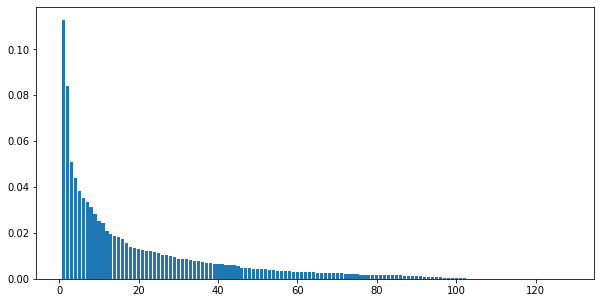

In [102]:
plt.figure(figsize=(10,5))
plt.bar(range(1,len(pca.components_)+1),pca.explained_variance_ratio_)

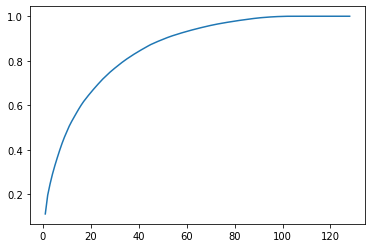

In [103]:
var_cums=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(pca.components_)+1),var_cums)

In [0]:
#around 90 columns will explain 95% of data
pca1=PCA(n_components=90,random_state=42)
df_train=pca1.fit_transform(x_balaned_train)

###  Models with PCA

In [0]:
from sklearn.tree import DecisionTreeClassifier
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
tree = DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9})

# hyperparameter space
params = {'max_depth':range(1,70)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy'}

# create gridsearch object
model_tree = GridSearchCV(estimator=tree, cv=folds, param_grid=params, scoring=scoring, refit='AUC',n_jobs=-1, verbose=1,return_train_score=True)

In [106]:
model_tree.fit(df_train, y_balanced_train)

Fitting 5 folds for each of 69 candidates, totalling 345 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 345 out of 345 | elapsed: 14.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='bes

In [107]:
scores = model_tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.405299      0.005865         0.007762        0.000331   
1       0.763733      0.010411         0.007814        0.000240   
2       1.221200      0.153851         0.008077        0.000259   
3       1.433280      0.014706         0.009023        0.001576   
4       1.754362      0.012371         0.008064        0.000124   

  param_max_depth            params  split0_test_AUC  split1_test_AUC  \
0               1  {'max_depth': 1}         0.692057         0.702806   
1               2  {'max_depth': 2}         0.778479         0.780124   
2               3  {'max_depth': 3}         0.822794         0.821057   
3               4  {'max_depth': 4}         0.862525         0.857099   
4               5  {'max_depth': 5}         0.882350         0.872199   

   split2_test_AUC  split3_test_AUC  split4_test_AUC  mean_test_AUC  \
0         0.700810         0.687899         0.696517       0.696018   
1         0.783744         0.772185         0.781886       0.779284   
2         0.822864         0.816978         0.833409       0.823420   
3         0.860983         0.855468         0.867766       0.860768   
4         0.880491         0.872466         0.884837       0.878469   

   std_test_AUC  rank_test_AUC  split0_train_AUC  split1_train_AUC  \
0      0.005494             69          0.697208          0.694587   
1      0.003960             68          0.779807          0.777939   
2      0.005432             67          0.825034          0.823624   
3      0.004328             42          0.864244          0.865017   
4      0.005197             16          0.885317          0.887166   

   split2_train_AUC  split3_train_AUC  split4_train_AUC  mean_train_AUC  \
0          0.695752          0.698347          0.696159        0.696411   
1          0.779304          0.779842          0.784868        0.780352   
2          0.824911          0.824115          0.826720        0.824881   
3          0.864436          0.864595          0.865082        0.864675   
4          0.886599          0.886857          0.886107        0.886409   

   std_train_AUC  split0_test_Accuracy  split1_test_Accuracy  \
0       0.001281              0.333392              0.333274   
1       0.002361              0.533889              0.540905   
2       0.001056              0.672463              0.670630   
3       0.000326              0.595990              0.595741   
4       0.000647              0.655784              0.648980   

   split2_test_Accuracy  split3_test_Accuracy  split4_test_Accuracy  \
0              0.333274              0.333274              0.333452   
1              0.544987              0.531677              0.535049   
2              0.676309              0.656610              0.678971   
3              0.601242              0.563798              0.610648   
4              0.677196              0.647028              0.674889   

   mean_test_Accuracy  std_test_Accuracy  rank_test_Accuracy  \
0            0.333333           0.000075                  69   
1            0.537301           0.004907                  68   
2            0.670997           0.007760                  65   
3            0.593484           0.015795                  67   
4            0.660775           0.012821                  66   

   split0_train_Accuracy  split1_train_Accuracy  split2_train_Accuracy  \
0               0.333319               0.333348               0.333348   
1               0.536779               0.535114               0.543188   
2               0.672094               0.665010               0.672641   
3               0.595031               0.598642               0.606051   
4               0.659228               0.659554               0.686970   

   split3_train_Accuracy  split4_train_Accuracy  mean_train_Accuracy  \
0               0.333348               0.333304             0.333333   
1               0.537554               0.536622             0.537851   
2   

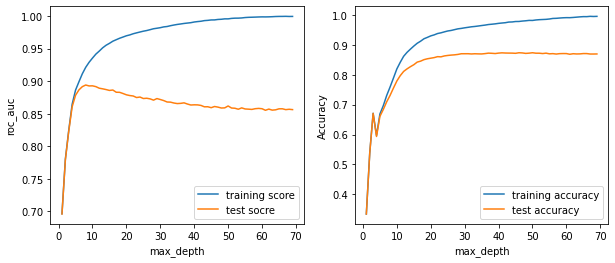

In [108]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(scores["param_max_depth"], 
         scores["mean_train_AUC"], 
         label="training score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_AUC"], 
         label="test socre")
plt.xlabel("max_depth")
plt.ylabel("roc_auc")
plt.legend()

plt.subplot(1,2,2)
plt.plot(scores["param_max_depth"], 
         scores["mean_train_Accuracy"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_Accuracy"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()



In [109]:
# print best hyperparameters
print("Best AUC: ", model_tree.best_score_)
print("Best hyperparameters: ", model_tree.best_params_)


y_train_pred = model_tree.predict(df_train)
acc_score = metrics.accuracy_score(y_balanced_train, y_train_pred)
print(acc_score)

Best AUC:  0.894255127693292
Best hyperparameters:  {'max_depth': 8}
0.7605408858603067


In [110]:
df_test=pca1.transform(x_test)

# predict churn on test data
y_pred = model_tree.predict(df_test)

acc_score = metrics.accuracy_score(y_test, y_pred)
print(acc_score)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model_tree.predict_proba(df_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

0.6547671840354767
[[5039 3012]
 [ 102  867]]
AUC:    	 0.86


In [0]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8947368421052632

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.6258849832318967

In [0]:
from sklearn.tree import DecisionTreeClassifier
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
tree = DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9},max_depth=10)

# hyperparameter space
params = {'min_samples_leaf':range(100, 1000, 200)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy'}

# create gridsearch object
model_tree = GridSearchCV(estimator=tree, cv=folds, param_grid=params, scoring=scoring,refit='AUC', n_jobs=-1, verbose=1,return_train_score=True)

In [115]:
model_tree.fit(df_train, y_balanced_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   24.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=10,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'

In [116]:
scores = model_tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.501117      0.036442         0.008416        0.000131   
1       2.049737      0.015675         0.009767        0.003079   
2       1.834265      0.030095         0.008131        0.000090   
3       1.623905      0.007595         0.007965        0.000122   
4       1.423369      0.183056         0.007896        0.001055   

  param_min_samples_leaf                     params  split0_test_AUC  \
0                    100  {'min_samples_leaf': 100}         0.907615   
1                    300  {'min_samples_leaf': 300}         0.894795   
2                    500  {'min_samples_leaf': 500}         0.887350   
3                    700  {'min_samples_leaf': 700}         0.882452   
4                    900  {'min_samples_leaf': 900}         0.874428   

   split1_test_AUC  split2_test_AUC  split3_test_AUC  split4_test_AUC  \
0         0.899226         0.905236         0.900380         0.908927   
1         0.888683         0.894975         0.885236         0.897511   
2         0.882272         0.888242         0.881554         0.890649   
3         0.879263         0.881018         0.876618         0.883898   
4         0.869193         0.875258         0.868875         0.875292   

   mean_test_AUC  std_test_AUC  rank_test_AUC  split0_train_AUC  \
0       0.904277      0.003857              1          0.926905   
1       0.892240      0.004550              2          0.904996   
2       0.886014      0.003525              3          0.894445   
3       0.880650      0.002534              4          0.884305   
4       0.872609      0.002937              5          0.876057   

   split1_train_AUC  split2_train_AUC  split3_train_AUC  split4_train_AUC  \
0          0.928681          0.926108          0.926100          0.928929   
1          0.906683          0.906674          0.904548          0.906290   
2          0.896371          0.896509          0.896260          0.893369   
3          0.887179          0.885353          0.886195          0.885190   
4          0.874747          0.879298          0.878240          0.877069   

   mean_train_AUC  std_train_AUC  split0_test_Accuracy  split1_test_Accuracy  \
0        0.927345       0.001230              0.709723              0.713221   
1        0.905838       0.000893              0.674769              0.659805   
2        0.895391       0.001261              0.700852              0.721207   
3        0.885645       0.000974              0.636444              0.653949   
4        0.877082       0.001597              0.636444              0.637090   

   split2_test_Accuracy  split3_test_Accuracy  split4_test_Accuracy  \
0              0.706477              0.710736              0.721917   
1              0.690328              0.684827              0.692458   
2              0.684295              0.707542              0.697072   
3              0.664241              0.651642              0.634428   
4              0.642059              0.622715              0.644188   

   mean_test_Accuracy  std_test_Accuracy  rank_test_Accuracy  \
0            0.712415           0.005220                   1   
1            0.680437           0.011995                   3   
2            0.702193           0.012153                   2   
3            0.648141           0.011226                   4   
4            0.636499           0.007488                   5   

   split0_train_Accuracy  split1_train_Accuracy  split2_train_Accuracy  \
0               0.727196               0.733907               0.729116   
1               0.685359               0.678320               0.697839   
2               0.704437               0.731290               0.690253   
3               0.637311               0.653432               0.666608   
4               0.637311               0.633512               0.640965   

   split3_train_Accuracy  split4_train_Accuracy  mean_train_Accuracy  \
0               0.733863               0.738432     

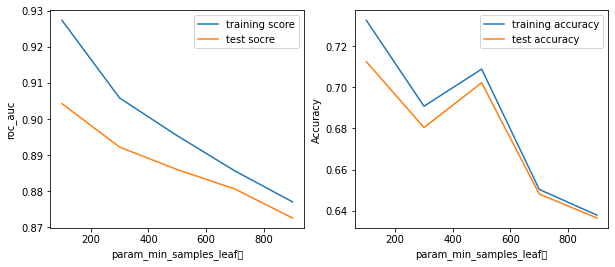

In [117]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_AUC"], 
         label="training score")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_AUC"], 
         label="test socre")
plt.xlabel("param_min_samples_leaf	")
plt.ylabel("roc_auc")
plt.legend()

plt.subplot(1,2,2)
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_Accuracy"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_Accuracy"], 
         label="test accuracy")
plt.xlabel("param_min_samples_leaf	")
plt.ylabel("Accuracy")
plt.legend()



In [118]:
model_2 = DecisionTreeClassifier(max_depth=10,min_samples_leaf=500)
model_2.fit(df_train, y_balanced_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=500, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [119]:
df_test=pca1.transform(x_test)

# predict churn on test data
y_pred = model_2.predict(df_test)

acc_score = metrics.accuracy_score(y_test, y_pred)
print(acc_score)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model_2.predict_proba(df_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

0.8773835920177384
[[7296  755]
 [ 351  618]]
AUC:    	 0.87


In [0]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6377708978328174

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.9062228294621786

In [0]:
#LogisticRegression

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(df_train, y_balanced_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [125]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8734036455636757


In [126]:
logisticRegres=LogisticRegression(penalty='l2', C=0.01)
logisticRegres.fit(df_train, y_balanced_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
df_test=pca1.transform(x_test)

# predict churn on test data
y_pred = logisticRegres.predict(df_test)
acc_score = metrics.accuracy_score(y_test, y_pred)
print(acc_score)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = logisticRegres.predict_proba(df_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

0.8837028824833703
[[7205  846]
 [ 203  766]]
AUC:    	 0.91


In [0]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7905056759545923

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.8949198857284809

In [131]:
from sklearn.ensemble import AdaBoostClassifier

lr=LogisticRegression()
classifier = AdaBoostClassifier(
    lr,
    n_estimators=200
)
classifier.fit(df_train, y_balanced_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=200, random_state=None)

In [132]:
df_test=pca1.transform(x_test)

# predict churn on test data
y_pred = classifier.predict(df_test)
acc_score = metrics.accuracy_score(y_test, y_pred)
print(acc_score)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = classifier.predict_proba(df_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

0.8762749445676274
[[7161  890]
 [ 226  743]]
AUC:    	 0.9


In [0]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7667698658410733

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.8894547261209788

In [0]:
#AdaBoost with decsion tree classifier

In [0]:
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [138]:
# fit the shallow decision tree 
shallow_tree.fit(df_train, y_balanced_train)

# test error
y_pred = shallow_tree.predict(df_test)
acc_score = metrics.accuracy_score(y_test, y_pred)
acc_score

0.8843680709534368

In [139]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = shallow_tree.predict_proba(df_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7593  458]
 [ 585  384]]
AUC:    	 0.8


In [0]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.39628482972136225

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.9431126568128183

In [0]:
# adaboost with the tree as base estimator

estimators = list(range(1, 50, 3))

abc_scores = []
sensitivity=[]
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(df_train, y_balanced_train)
    y_pred = ABC.predict(df_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1,1] # true positive 
    FN = cm[1,0] # false negatives
    sen=TP / float(TP+FN)
    sensitivity.append(sen)

    

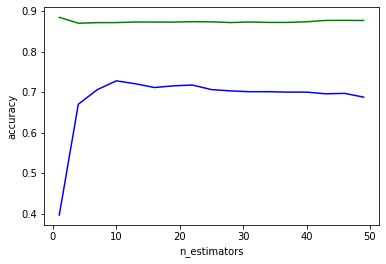

In [144]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores,'g')
plt.plot(estimators,sensitivity,'b')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [0]:
#we are getting good sensitivty at 10 estimators, lets build adaboost with decison tree

In [0]:
adaBoost_model = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = 10)

In [147]:
# fit the adaBoost_model
adaBoost_model.fit(df_train, y_balanced_train)

# test error
y_pred = adaBoost_model.predict(df_test)

acc_score = metrics.accuracy_score(y_test, y_pred)
acc_score

0.8713968957871396

In [148]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = adaBoost_model.predict_proba(df_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7155  896]
 [ 264  705]]
AUC:    	 0.88


In [0]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7275541795665634

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.888709477083592

In [255]:
### Top 20 variables

feature_importance.head(20)



variables  importance_percentage
0     total_ic_mou_8               4.693945
1      roam_og_mou_8               4.563571
2       loc_ic_mou_8               4.453911
3   loc_ic_t2m_mou_8               3.644599
4      roam_ic_mou_8               3.566401
5     total_amt_diff               3.544909
6             arpu_8               3.369003
7   loc_og_t2m_mou_8               3.207695
8     total_og_mou_8               3.040246
9   loc_ic_t2t_mou_8               2.824905
10  total_rech_amt_8               2.760592
11      loc_og_mou_8               2.205396
12      std_ic_mou_8               2.028280
13    max_rech_amt_8               1.963070
14      offnet_mou_8               1.539271
15  total_rech_num_8               1.392472
16  loc_og_t2t_mou_8               1.316561
17       onnet_mou_8               1.292691
18  loc_ic_t2f_mou_8               1.261379
19  std_ic_t2m_mou_8               1.116078

# Summary and Recommendations

1. Offer discounted roaming outgoing packs

2. Monitor the total recharge, offer additional talk time with additional validity on the recharges

3. Give more discount to the customers who have been with the network for more than an year or less than 3 months

4. Give additional data on data pack recharges (for 7th month)

5. Based on the usage / last recharge, if the usage is less compared to previous months, speak to the customer to know his concerns